In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import analysis.lib.purification.purify_ssro as pu_ssro;reload(pu_ssro)
%matplotlib inline

reloaded
reloaded
reloaded


## Repump speed

In [ ]:
### to be written // imported from Qmemory

## average repump time Z

reloaded
d:\measuring\data
Converged with chi squared  0.0234415228174
degrees of freedom, dof  22
RMS of residuals (i.e. sqrt(chisq/dof))  0.032642361502
Reduced chisq (i.e. variance of residuals)  0.00106552376443

fitted parameters at minimum, with 68% C.I.:
 0 a              0.011315 +/-   0.008458
 1 A              0.595522 +/-   0.021622
 2 x0             0.247262 +/-   0.005049
 3 sigma          0.125313 +/-   0.005642

correlation matrix:
               a         A         x0        sigma     
         a  1.000000
         A -0.276617  1.000000
        x0  0.000000  0.000134  1.000000
     sigma -0.446211 -0.373066 -0.000108  1.000000



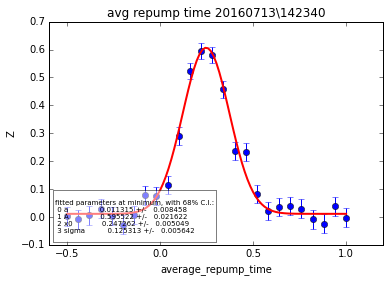

In [20]:
reload(pu_ssro)
pu_ssro.average_repump_time(contains = '_Z', do_fit = True, fixed = [])

## average repump time XY

reloaded
d:\measuring\data
Converged with chi squared  0.0260243252162
degrees of freedom, dof  22
RMS of residuals (i.e. sqrt(chisq/dof))  0.0343936603674
Reduced chisq (i.e. variance of residuals)  0.00118292387347

fitted parameters at minimum, with 68% C.I.:
 0 a          -4326.353737 +/-        nan
 1 A           4327.025732 +/-        nan
 2 x0             0.220446 +/-   0.012073
 3 sigma         58.720306 +/-        nan

correlation matrix:
               a         A         x0        sigma     
         a -1.000000
         A  1.000000 -1.000000
        x0       nan       nan  1.000000
     sigma  1.000000 -1.000000       nan -1.000000



d:/measuring\analysis\lib\fitting\fit.py:200: RuntimeWarning: invalid value encountered in sqrt
  sqrt(result['cov'][i,i] * result['cov'][j,j]),)


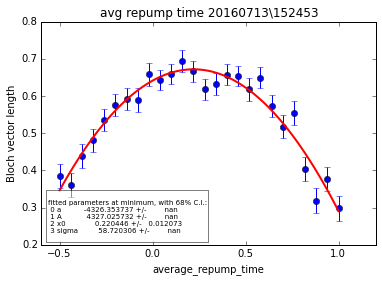

In [44]:
reload(pu_ssro)
pu_ssro.average_repump_time(contains = '_X', do_fit = True, fixed = [])

## Number of repetitions

reloaded
d:\measuring\data
Converged with chi squared  0.00719138989008
degrees of freedom, dof  13
RMS of residuals (i.e. sqrt(chisq/dof))  0.0235198604949
Reduced chisq (i.e. variance of residuals)  0.000553183837698

fitted parameters at minimum, with 68% C.I.:
 0 A              0.911274 +/-   0.011831
 1 T           2865.668541 +/- 936.718463

correlation matrix:
               A         T         
         A  1.000000
         T -0.847308  1.000000



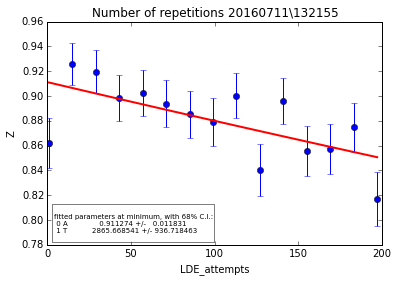

In [3]:
reload(pu_ssro)
# pu_ssro.number_of_repetitions(contains = '_X', do_fit = True, show_guess = False, fit_n = 1,fit_f = 1e-10, fixed = [0,2,4,5,6])
pu_ssro.number_of_repetitions(contains = '_Z', do_fit = True, show_guess = False, fit_T =3000,fit_n = 1, fit_f = 1e-10, fixed = [0,2,4,5,6], older_than = None)

## El to C swap

In [4]:
reload(pu_ssro)
pu_ssro.el_to_c_swap(input_el=['X','mX','Y','mY','Z'])

reloaded
this is the timestamp  20161006\095635
                             X                 Y                 Z
--------------------------------------------------------------------------------------------------
               X |      0.1 +/- 0.02    -0.11 +/- 0.02     0.85 +/- 0.01
--------------------------------------------------------------------------------------------------
              mX |     0.02 +/- 0.02     0.18 +/- 0.02    -0.92 +/- 0.01
--------------------------------------------------------------------------------------------------
               Y |     0.06 +/- 0.02     0.93 +/- 0.01    -0.13 +/- 0.02
--------------------------------------------------------------------------------------------------
              mY |     0.11 +/- 0.02     -0.9 +/- 0.01     0.13 +/- 0.02
--------------------------------------------------------------------------------------------------
               Z |    -0.93 +/- 0.01    -0.09 +/- 0.02     0.25 +/- 0.02


# Swap vs LDE attempts

reloaded
d:\measuring\data


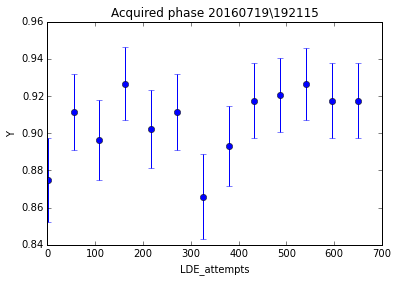

In [41]:
reload(pu_ssro)
tomo_basis = 'Y'
pu_ssro.calibrate_LDE_phase(contains = 'LDE_attempts_vs_swap',tomo_basis = tomo_basis,
                            do_fit = False,fixed = [0,4],decay = 1e5,
                            show_guess = False, phi0=240,freq = 1/360.)

## Calibrate LDE phase

In [5]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'LDE_phase', do_fit = True,fixed = [1],show_guess = False, phi0 = 180, freq = 1./20, older_than = None)

reloaded


KeyError: "Can't open attribute (Can't locate attribute: 'sweep_name')"

## Calibrate feedback phase

reloaded
Converged with chi squared  0.000902920153399
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0100162099363
Reduced chisq (i.e. variance of residuals)  0.000100324461489

fitted parameters at minimum, with 68% C.I.:
 0 f              0.034952 +/-   0.000052
 1 a              0.130263 +/-   0.002950
 2 A              0.789223 +/-   0.008460
 3 phi          371.757573 +/-   0.584238
 4 t           2552.337987 +/- 2038.905952

correlation matrix:
               f         a         A         phi       t         
         f  1.000000
         a -0.403577  1.000000
         A -0.101921  0.154588  1.000000
       phi -0.880018  0.359359  0.142752  1.000000
         t  0.032617 -0.126685 -0.886023 -0.091596  1.000000

This is the phase detuning 0
Acquired phase per repetition (compensating for phase_detuning=) 12.583 +/- 0.019
phase offset  371.758


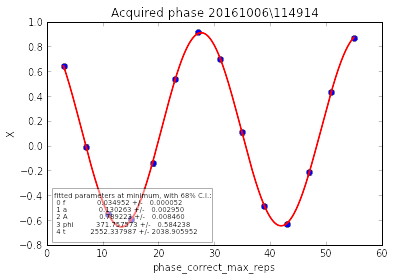

In [11]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'phase_compensation',do_fit = True,fixed = [],show_guess = False, phi0=240,freq = 14/360.)

In [14]:
print 360/13.168 #2.311
print 360/13.777 #2.312
print 360/11.956 #2.309
print 360/12.551 #2.310

27.3390036452
26.1305073674
30.1104048177
28.6829734682


# Apply phase feedback

reloaded
2
starting fit.fit1d
Converged with chi squared  0.01586086725
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0363557277125
Reduced chisq (i.e. variance of residuals)  0.0013217389375

fitted parameters at minimum, with 68% C.I.:
 0 a              0.459214 +/-   0.008988
 1 A             -0.430790 +/-   0.027501
 2 T            165.447369 +/-  12.473618
 3 f              0.008104 +/-   0.000160
 4 phi          119.743739 +/-   4.627969

correlation matrix:
               a         A         T         f         phi       
         a  1.000000
         A  0.185780  1.000000
         T  0.121289  0.567301  1.000000
         f  0.019667 -0.167440 -0.095110  1.000000
       phi  0.006674  0.211577  0.120673 -0.764348  1.000000

d:\measuring\data\20161006\131146_purifcation slave_Pippin_SIL2_ADwin_phase_compensation_Z


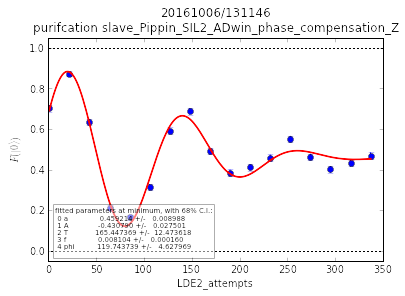

2.91756347762 0.057708992905
119.743738966 4.62796932515


In [13]:
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)

Result = fits.exp_sin(timestamp=  None, contains = '_Z',
                      offset=[0.5], amplitude = [0.35], center = [0], decay_constant = [500], 
                      exp_power = [2],
                      frequency = [4./360], phase =[0], 
                      fixed = [2,4],
                      ylim = None,
                      plot_fit = True,do_print = True, show_guess = False)
phase_per_point = 360*Result[0]['params_dict']['f']
phase_error =  360*Result[0]['error_dict']['f']
offset = Result[0]['params_dict']['phi']
offset_error = Result[0]['error_dict']['phi']

print phase_per_point,phase_error
print offset, offset_error

## Check phase offset after LDE2

In [15]:
reload(pu_ssro)
pu_ssro.phase_offset_after_LDE() ### tomographic measurement

reloaded
d:\measuring\data
this is the timestamp  20160711\151812
                 X                 Y                 Z
-------------------------------------------------------------------------
     0.29 +/- 0.04     0.21 +/- 0.04     0.76 +/- 0.03


reloaded
Converged with chi squared  0.00321944298427
degrees of freedom, dof  7
RMS of residuals (i.e. sqrt(chisq/dof))  0.0214457554384
Reduced chisq (i.e. variance of residuals)  0.000459920426324

fitted parameters at minimum, with 68% C.I.:
 0 a              0.002648 +/-   0.006844
 1 A             -0.850483 +/-   0.009248
 2 phi          183.164559 +/-   0.682113

correlation matrix:
               a         A         phi       
         a  1.000000
         A  0.134547  1.000000
       phi  0.007482 -0.010609  1.000000

no phase detuning found


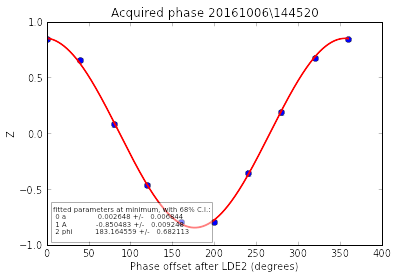

you have to add this to the offset phase:  356.835441498


In [7]:
reload(pu_ssro)
tomo_basis = 'Z'
fit_result = pu_ssro.calibrate_LDE_phase(contains = '_phase_offset_after_LDE_'+tomo_basis,tomo_basis = tomo_basis,
                            do_fit = True,fixed = [0,4],decay = 1e5,
                            show_guess = False, phi0=240,freq = 1/360.,ret= True,post_select_e_outcome=False)

phi = fit_result['params_dict']['phi']
print 'you have to add this to the offset phase: ', -phi % 360

# Full sequence local with rotation to Z

reloaded
d:\measuring\data
Converged with chi squared  0.033044585079
degrees of freedom, dof  8
RMS of residuals (i.e. sqrt(chisq/dof))  0.0642695350448
Reduced chisq (i.e. variance of residuals)  0.00413057313488

fitted parameters at minimum, with 68% C.I.:
 0 A              0.413084 +/-   0.041161
 1 t            470.264026 +/- 230.609980

correlation matrix:
               A         t         
         A  1.000000
         t -0.807141  1.000000

This is the phase detuning 0
no phase detuning found
and here is where i would post select the data


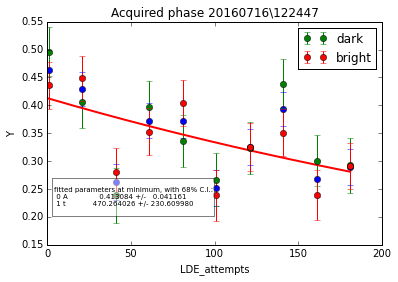

In [3]:
reload(pu_ssro)
tomo_basis = 'Y'
pu_ssro.calibrate_LDE_phase(contains = 'full_sequence',tomo_basis = tomo_basis,
                            do_fit = True,fixed = [0,1,3],decay = 250,
                            show_guess = False, phi0=0,freq = 0,post_select = True)

# Classical correlations

reloaded
and here is where i would post select the data


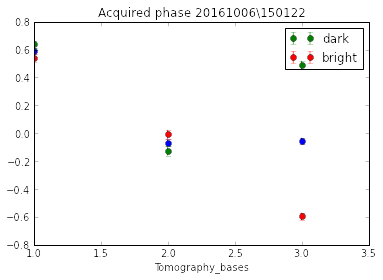

In [10]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = '_Z',do_fit = False,ret = False, 
                                     tomo_basis = '',show_guess = False,post_select_e_outcome = True)
